#### Imports ###

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Load Data ####

In [12]:
train_df = pd.read_csv('data/train.csv')
center_info = pd.read_csv('data/fulfilment_center_info.csv')
meal_info = pd.read_csv('data/meal_info.csv')
test_df = pd.read_csv('data/test.csv')


In [14]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [16]:
center_info

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [18]:
meal_info

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [22]:
test_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


**In addition to the train data, there are additional files with features related to the center and meal**
* *We will have to merge these*

#### Review/Explore the data in each of these dfs ####

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [31]:
center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [33]:
center_info.center_type.value_counts()

center_type
TYPE_A    43
TYPE_C    19
TYPE_B    15
Name: count, dtype: int64

In [35]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [37]:
meal_info.category.value_counts()

category
Beverages       12
Extras           3
Soup             3
Other Snacks     3
Salad            3
Rice Bowl        3
Starters         3
Sandwich         3
Pasta            3
Desert           3
Biryani          3
Pizza            3
Fish             3
Seafood          3
Name: count, dtype: int64

In [39]:
meal_info.cuisine.value_counts()

cuisine
Thai           15
Indian         12
Italian        12
Continental    12
Name: count, dtype: int64

##### Check for duplicates ######

In [43]:
train_df.duplicated().sum()

0

In [45]:
center_info.duplicated().sum()

0

In [47]:
meal_info.duplicated().sum()

0

In [49]:
test_df.duplicated().sum()

0

#### Merge the reference data ####

In [175]:
train_merged = pd.merge(train_df, center_info, on="center_id", how="left")
train_merged

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5


In [177]:
train_merged = pd.merge(train_merged, meal_info, on="meal_id", how="left")
train_merged

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian


In [218]:
test_merged = pd.merge(test_df, center_info, on="center_id", how="left")
test_merged = pd.merge(test_merged, meal_info, on="meal_id", how="left")
test_merged

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0,Beverages,Indian
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0,473,77,TYPE_A,4.5,Desert,Indian
32569,1039516,155,61,2304,483.09,483.09,0,0,473,77,TYPE_A,4.5,Desert,Indian
32570,1158107,155,61,2664,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian
32571,1444235,155,61,2569,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian


* *Note: Since all the features in meal_info will be tied to the meal_id, and all features in center_info will be related to center_id,*
    * Does it make sense that center_id and meail_id could technically represent the sum of their features for this particular use case??
    * *i.e., predictions are also by week per center and per meal*

#### EDA ####

1. Handle Missing values
2. Understand the features that need to be encoded
3. Correlation of features
4. Feature selection
5. Distribution of orders across centers
6. Distribution of orders by meal ids
7. Orders by center type, by other key center features
8. Orders by meal category and cuisine
9. Impact of email promo and featuring on homepage

*Note that most of these are not really necessary for the problem statement, since the goal is simply predicting the orders for next 10 weeks by center_id and meal_id*

#### Drop Columns
* Drop 'id' column as it is not needed for modeling

In [179]:
train_merged.drop('id', axis=1, inplace=True)
train_merged.head(2)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai


In [220]:
test_merged.drop('id', axis=1, inplace=True)
test_merged.head(2)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


##### Missing Values

*Looks like the data does not have orders for all center-meal combos for all weeks*

In [181]:
num_centers = train_merged.center_id.nunique()
num_centers

77

In [183]:
num_meals = train_merged.meal_id.nunique()
num_meals

51

In [185]:
#Number of unique center-meal combos
center_meal_combos = num_centers * num_meals
center_meal_combos

3927

In [187]:
expected_rows_in_train = num_centers * num_meals * 145
expected_rows_in_train

569415

In [189]:
len(train_merged)

456548

In [191]:
missing_rows = expected_rows_in_train - len(train_merged)
missing_rows

112867

* **We need to add rows with 0 orders to get a proper time series analysis data - to be able to run Time Series Analysis models**

##### Features to be encoded #####
1. center_type - LabelEncoder
2. category - LabelEncoder
3. cuisine - LabelEncoder

In [193]:
label_encoded_cols = ['center_type', 'category', 'cuisine']

##### Distribution of orders by categorical columns #####

In [198]:
def catcol_info_dist(df, col, xticks=45):
    print(pd.DataFrame({col: df[col].value_counts(),
                        "Percentage": 100 * df[col].value_counts() / len(df)}))
    print("--------------------------------------------")
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=xticks)

              category  Percentage
category                          
Beverages       127890   28.012389
Rice Bowl        33408    7.317522
Sandwich         33291    7.291895
Pizza            33138    7.258382
Starters         29941    6.558128
Other Snacks     29379    6.435030
Desert           29294    6.416412
Salad            28559    6.255421
Pasta            27694    6.065956
Seafood          26916    5.895547
Biryani          20614    4.515188
Extras           13562    2.970553
Soup             12675    2.776269
Fish             10187    2.231310
--------------------------------------------


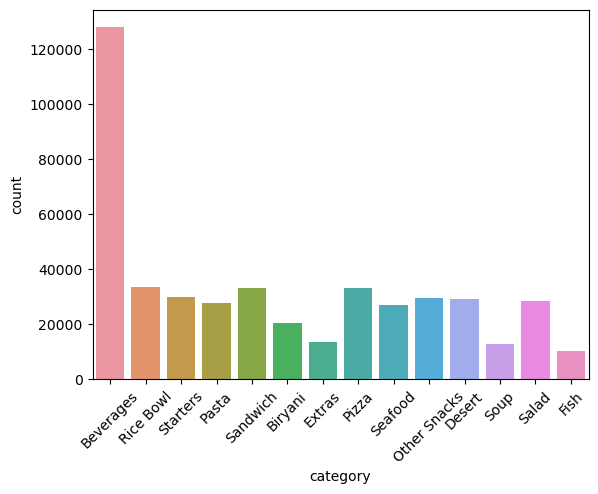

In [200]:
catcol_info_dist(train_merged, 'category')

             cuisine  Percentage
cuisine                         
Italian       122925   26.924880
Thai          118216   25.893444
Indian        112612   24.665972
Continental   102795   22.515705
--------------------------------------------


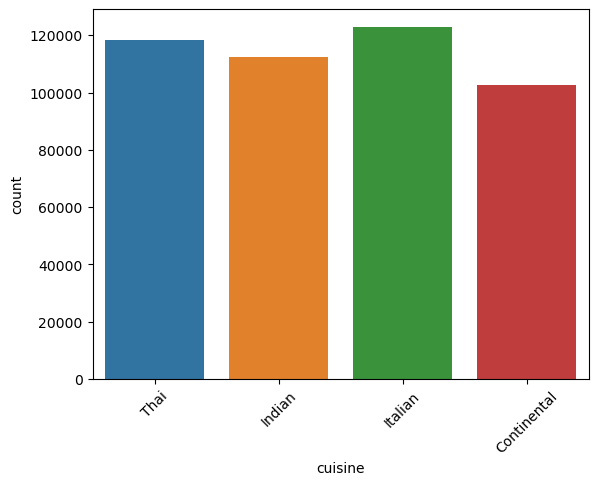

In [202]:
catcol_info_dist(train_merged, 'cuisine')        

             center_type  Percentage
center_type                         
TYPE_A            262881   57.580145
TYPE_C             99593   21.814355
TYPE_B             94074   20.605500
--------------------------------------------


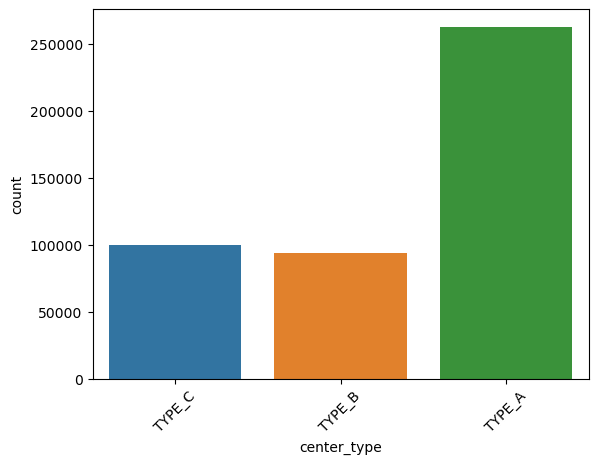

In [204]:
catcol_info_dist(train_merged, 'center_type')

                       emailer_for_promotion  Percentage
emailer_for_promotion                                   
0                                     419498   91.884753
1                                      37050    8.115247
--------------------------------------------


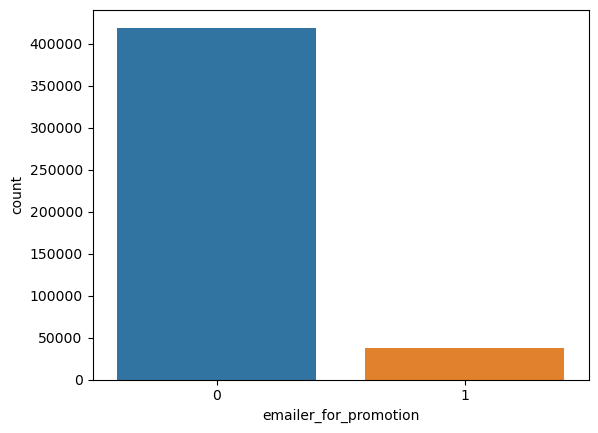

In [206]:
catcol_info_dist(train_merged, 'emailer_for_promotion', 0)

                   homepage_featured  Percentage
homepage_featured                               
0                             406693   89.080009
1                              49855   10.919991
--------------------------------------------


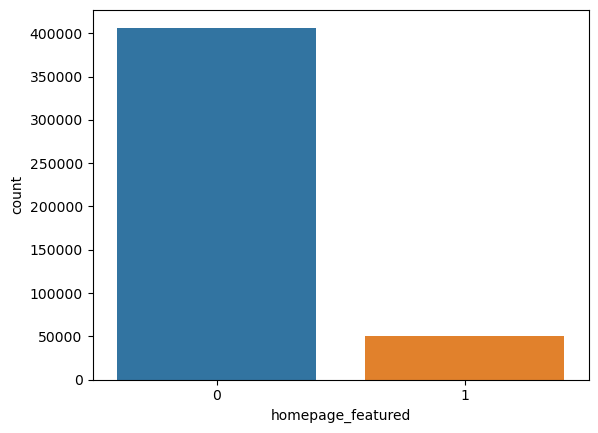

In [208]:
catcol_info_dist(train_merged, 'homepage_featured', 0)

         op_area  Percentage
op_area                     
4.0        52548   11.509852
3.9        48533   10.630427
3.8        40080    8.778924
4.4        26060    5.708053
4.5        25688    5.626572
2.8        25503    5.586050
4.1        23346    5.113592
7.0        20686    4.530958
4.8        18648    4.084565
3.4        17258    3.780106
3.6        16821    3.684388
5.1        13366    2.927622
4.2        12608    2.761594
2.7        12430    2.722605
3.0        11184    2.449688
2.0         9512    2.083461
6.7         7046    1.543321
6.3         7015    1.536531
5.6         6993    1.531712
3.7         6801    1.489657
3.5         6666    1.460087
3.2         6333    1.387149
5.0         6164    1.350132
5.3         6053    1.325819
4.6         5983    1.310487
4.7         5975    1.308734
2.4         5021    1.099775
2.9         4712    1.032093
1.9         4083    0.894320
0.9         3432    0.751728
--------------------------------------------


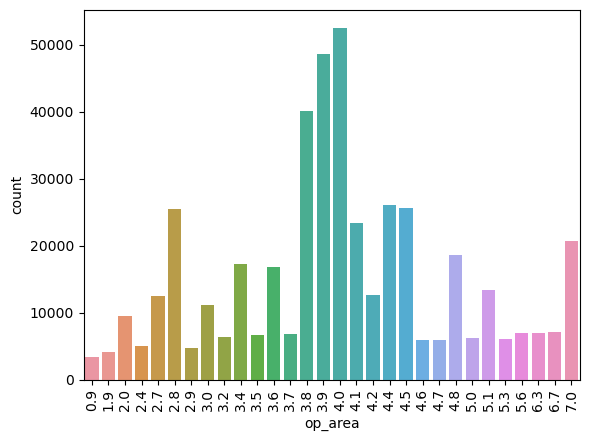

In [210]:
catcol_info_dist(train_merged, 'op_area', 90)

In [212]:
corr = train_merged.corr(numeric_only=True)
corr

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
week,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550
center_id,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869
meal_id,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546
checkout_price,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569
base_price,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,0.018031
emailer_for_promotion,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462
homepage_featured,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498
num_orders,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976
city_code,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476
region_code,0.004600,-0.003426,-0.001662,-0.003648,-0.001934,-0.007462,0.003605,0.029744,0.042686,1.000000,0.023327


In [214]:
corr[['num_orders']].sort_values('num_orders')

,num_orders
checkout_price,-0.282108
base_price,-0.222306
center_id,-0.053035
week,-0.017210
meal_id,0.010597
region_code,0.029744
city_code,0.041596
op_area,0.176976
emailer_for_promotion,0.277147
homepage_featured,0.294490


* *Shows good positive correlation with emailer_for_promotion, homepage_featured, op_area - as expected*

#### Modeling

##### Train / Test Split

In [224]:
X = train_merged.drop(['num_orders'], axis = 1)
y = train_merged['num_orders']
X.shape, y.shape

((456548, 13), (456548,))

In [229]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((365238, 13), (91310, 13), (365238,), (91310,))

#### Linear Regression Model

In [232]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer

rmsle_scorer = make_scorer(mean_squared_log_error, greater_is_better=False, squared=False)


In [248]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer

transformer = make_column_transformer((LabelEncoder(), label_encoded_cols))
preprocessor = ColumnTransformer(
    transformers=[
        ('label_encoder', LabelEncoder(), label_encoded_cols)
    ])


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

lr_pipe = Pipeline([('transform', preprocessor),
                    ('model', LinearRegression())])
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)
rmsle = rmsle_scorer(y_test, y_pred)
print(f'RMSLE: {rmsle}')
